In [1]:
from meanderutils import *
import matplotlib
from styles import *
import scipy.special
from numba import jit
from scipy.optimize import curve_fit
from scipy.integrate import trapezoid, cumulative_trapezoid


{'rblinkcolor': '#124984', 'rbblue': '#124984', 'rbprimarycolor': '#C43B3C', 'rbbluea': '#21114E', 'rbblueb': '#26447A', 'rbbluec': '#297393', 'rbblued': '#4EA2A4', 'rbbluee': '#9ACBBA', 'rbbluef': '#EBF3EF', 'rbrbluea': '#EEF5FC', 'rbrblueb': '#CADEF0', 'rbrbluec': '#91C3DE', 'rbrblued': '#4D99CA', 'rbrbluee': '#1C6BB0', 'rbrbluef': '#083C7D', 'rblightgray': '#D5D5D5', 'rbdarkgray': '#343434', 'rbsecondarycolor': '#91C3DE'}


In [2]:
q = 1.0


# size_data = {1.0: [128, 256, 512, 1024, 2048],
#              2.0: [128, 256, 512], # , 4096, 8192
#              4.0: [128, 256, 512]}

size_data = {1.0: [256, 512, 1024, 2048, 4096, 8192, 16384, 32678],
             2.0: [256, 512, 1024, 2048, 4096, 8192, 16384], # , 4096, 8192
             4.0: []}

In [5]:
data_per_size = dict()

plt.figure(figsize=(6, 2.5))
#fig, axs = plt.subplots(nrows=len(size_data[q]), sharex=True, dpi=300)
#axs_ = axs.flat

q = 2.0

sns.set_palette(sns.color_palette("tab20"))

for i, n in enumerate(size_data[q]):
    for data in SimDataIterator(q=q, n=n, name="thermalizationtime"):
        rate = data["measurements"][0]["rate"]
        print(rate/(2*n), 2*n/rate)
        sweeps = int(10*q)
        slice = int(2*n*sweeps/rate)
        # #samples_per_sweep = 64
        print("using", slice, "of", len(data["measurements"][0]["data"]))
        continuous_data = data["measurements"][0]["data"][:slice]
        # print(len(continuous_data))
        time = data["time_flipping"]
        print(time/data["iter"]*slice/1E9, "s")
        plt.title("Thermalization for $q = {}$".format(q))
        #plt.set_title('$n = {}$'.format(n))
        plt.plot(np.arange(0, len(continuous_data))*rate/(2*n), np.array(continuous_data)/continuous_data[0], label="$n = {}$".format(n))
        
        # #plt.label_outer()
plt.legend()
plt.xlim(left=0, right=10)
plt.ylabel("$k$ components normalized over $k_0$")
plt.xlabel("$n$ number of sweeps")
plt.grid()
plt.savefig("docs/results/assets/thermalizationtimeq2.pdf", bbox_inches='tight')
        #sns.lineplot(x=np.arange(len(continuous_data))/(2*n), y=np.array(continuous_data[])/continuous_data[0])#, label="{}".format(rate))

0.015625 64.0
using 1280 of 192000
0.0034173005991666667 s
0.015625 64.0
using 1280 of 192000
0.0031866064116666663 s
0.015625 64.0
using 1280 of 192000
0.003975866763333333 s
0.015625 64.0
using 1280 of 192000
0.003745194984583333 s
0.015625 64.0
using 1280 of 192000
0.005458045071927084 s
0.015625 64.0
using 1280 of 192000
0.004554459921796875 s
0.015625 64.0
using 1280 of 192000
0.006559035561575521 s


0.015625 64.0
using 640 of 96000
0.0016661530108333332 s
0.015625 64.0
using 640 of 96000
0.0018144380629166667 s
0.015625 64.0
using 640 of 96000
0.0019594569568750003 s
0.015625 64.0
using 640 of 96000
0.002130697001979167 s
0.015625 64.0
using 640 of 96000
0.0020135697170312497 s
0.015625 64.0
using 640 of 96000
0.0021228427020833335 s
0.015625 64.0
using 640 of 96000
0.002535985421796875 s


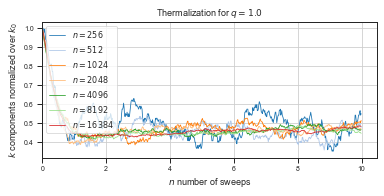

In [6]:
data_per_size = dict()

q = 1.0

sns.set_palette(sns.color_palette("tab20"))


plt.figure(figsize=(6, 2.5))
#fig, axs = plt.subplots(nrows=len(size_data[q]), sharex=True, dpi=300)
#axs_ = axs.flat

for i, n in enumerate(size_data[q]):
    for data in SimDataIterator(q=q, n=n, name="thermalizationtime"):
        rate = data["measurements"][0]["rate"]
        print(rate/(2*n), 2*n/rate)
        sweeps = int(10*q)
        slice = int(2*n*sweeps/rate)
        # #samples_per_sweep = 64
        print("using", slice, "of", len(data["measurements"][0]["data"]))
        continuous_data = data["measurements"][0]["data"][:slice]
        # print(len(continuous_data))
        time = data["time_flipping"]
        print(time/data["iter"]*slice/1E9, "s")
        plt.title("Thermalization for $q = {}$".format(q))
        #plt.set_title('$n = {}$'.format(n))
        plt.plot(np.arange(0, len(continuous_data))*rate/(2*n), np.array(continuous_data)/continuous_data[0], label="$n = {}$".format(n))
        
        # #plt.label_outer()
plt.legend()
plt.xlim(left=0)
plt.ylabel("$k$ components normalized over $k_0$")
plt.xlabel("$n$ number of sweeps")
plt.grid()
plt.savefig("docs/results/assets/thermalizationtime.pdf", bbox_inches='tight')
        #sns.lineplot(x=np.arange(len(continuous_data))/(2*n), y=np.array(continuous_data[])/continuous_data[0])#, label="{}".format(rate))

### Conclusion
We take $\tau_{\mathrm{eq}} = 500\ \mathrm{sweeps}$. At this point the distribution is nicely thermalized. Unfortunately we cannot compare the average number of connected components $k$ to a analytic value. This would correspond to 

$$
\mathbb{E}[k] = \sum_k k \cdot \frac{M^{(k)}_n}{M_n}
$$

For which, we do not have analytic results for $M^{(k)}_n$.

In [ ]:
for data in SimDataIterator(1.0, n=128, name="componentscorrelationtime"):
    continuous_data = data["measurements"][0]["data"][:2*n*1000]
    
    slices = np.linspace(n, 2*n*1000, 100, dtype=int)

    meanvals = []
    stddevs = []

    for slice in slices:
        meanvals.append(np.mean(continuous_data[:slice]))
        stddevs.append(np.std(continuous_data[:slice])/np.sqrt(slice))



   # mean = np.cumsum(continuous_data)/(np.arange(len(continuous_data))+1)

    plt.errorbar(x=slices/(2*n), y=meanvals/meanvals[-1], yerr=stddevs/meanvals[-1])
    #plt.errorbar(x=)
    plt.grid()
    #plt.xscale('log')
    #plt.yscale('log')
    #plt.xlim(left=1000)
    #plt.autoscale(axis='y')


In [5]:
def catalan(n):
    #return (1/(n+1))*scipy.special.binom(2*n, n)
    return (1/(n+1))*scipy.special.comb(2*n, n, exact=False)

def p_analytic(x, N):
    #b = np.arange(n+1)

    return (catalan(x)*catalan(N-x)/catalan(N))**2



Here


/tmp/ipykernel_84200/1328770235.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


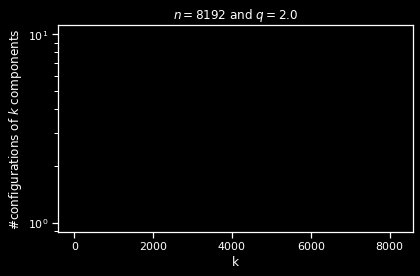

Here


/tmp/ipykernel_84200/1328770235.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


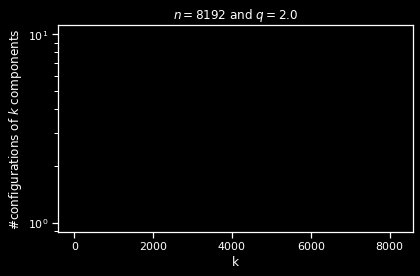

Here


/tmp/ipykernel_84200/1328770235.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


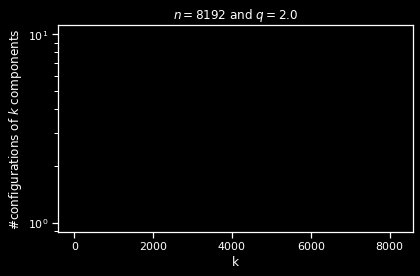

Here


/tmp/ipykernel_84200/1328770235.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


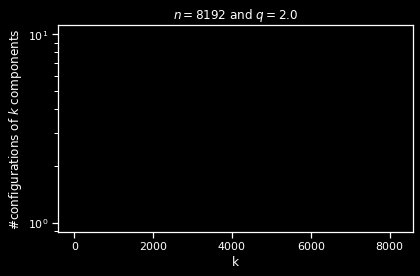

Here


/tmp/ipykernel_84200/1328770235.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


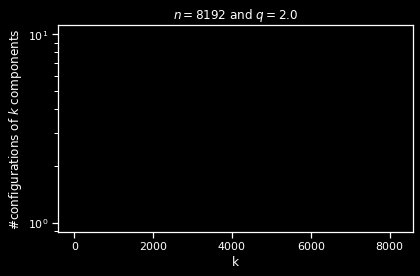

Here


/tmp/ipykernel_84200/1328770235.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


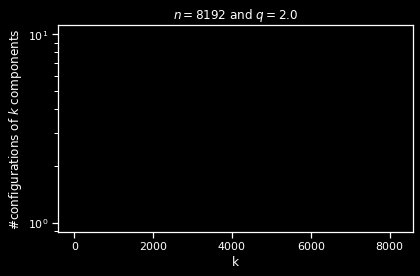

Here


/tmp/ipykernel_84200/1328770235.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


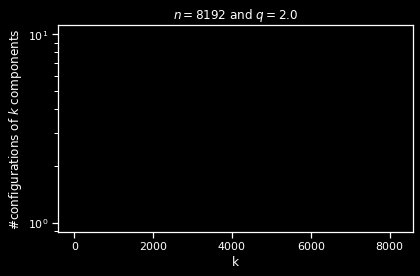

Here


/tmp/ipykernel_84200/1328770235.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


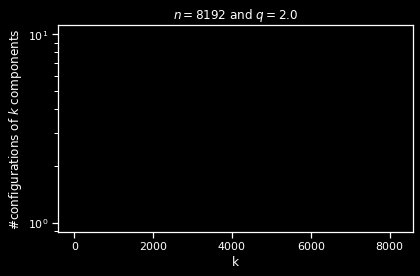

In [2]:
n = 8192
q = 2.0

#for data in SimDataIterator(2.0, n=8192, name="componentscorrelationtime"):
for data in SimDataIterator(q, n=n, name="compcorrelation"):
    print("Here")
    continuous_data = data["measurements"][0]["data"][2*n*1000:2*n*2000]
    hist, bin_edges = np.histogram(continuous_data, bins=np.arange(n))

    with plt.style.context('dark_background'):
        plt.plot(hist)
        plt.yscale("log")
        plt.ylabel("#configurations of $k$ components")
        plt.xlabel("k")
        #plt.xlim(left=1000, right=2000)
        plt.title("$n = {}$ and $q = {}$".format(n, q))
        plt.tight_layout()
        plt.show()
        #plt.savefig("phasetransistionq2n.pdf")
        
    #plt.xlim(right=50000)
    #plt.xlim(2800, 3300)
    

In [41]:
#q = 2.0
#n = 128

# size_data = {1.0: [256, 512, 1024, 2048],
#              2.0: [256, 512, 1024], # , 4096, 8192
#              4.0: []}

size_data = {0.05: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             0.1: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             0.2: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             0.4: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             0.6: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             0.8: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             1.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288],
             1.1: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             1.2: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             1.3: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             1.4: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             1.5: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             1.6: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             1.7: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             1.8: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             1.9: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             2.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             2.1: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             2.2: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             2.3: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             2.4: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             2.5: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             3.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             4.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             5.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             6.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             7.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             8.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             9.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             10.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
             11.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32678],
             12.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32678],
             13.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32678],
             14.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32678],
             15.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32678],
             16.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32678],
             17.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32678],
             18.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32678],
             19.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32678],
             20.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32678],
             21.0: [128, 256, 512, 1024, 2048],
             22.0: [128, 256, 512, 1024, 2048],
             23.0: [128, 256, 512, 1024, 2048],
             24.0: [128, 256, 512, 1024, 2048],
             25.0: [128, 256, 512, 1024, 2048],
             26.0: [128, 256, 512, 1024, 2048],
             27.0: [128, 256, 512, 1024, 2048],
             28.0: [128, 256, 512, 1024, 2048],
             29.0: [128, 256, 512, 1024, 2048],
             30.0: [128, 256, 512, 1024, 2048]}



#fig, axs = plt.subplots(1)

#axs = axs.flat

n_list = []
q_list = []
corr_list = []
gamma0_list = []
corrintegrated_list = []
M_list = []
rate_list = []
time_list = []
#corrfit_list = []


def sweepser(q, n):
    if q > 1:
        return sweeps(np.exp(abs(np.log(q)))*10, n=n)
    else:
        return sweeps(10, n=n)

def corrfit(x, t):
    return np.exp(-x/t)

for q in size_data.keys():
    for n in size_data[q]:
        corrtimes = []
        corrtimesfit = []

        for data in SimDataIterator(q=q, n=n, name="compcorrelation"):
            metadata = metadata_creator(data).T
            #print(metadata)
            avg_time_per_flip_us = metadata["time_per_flip (us)"].values[0]
            #print(avg_time_per_flip_us)
            time_list.append(avg_time_per_flip_us)
            continuous_data = data["measurements"][0]["data"]#[slice:]
            #print("n:", n, "continuous_data (length)", len(continuous_data))
            
            #start_pos = 200000
            #continuous_data = continuous_data[start_pos:1]
            #print(continuous_data)
            rate = data["measurements"][0]["rate"]
            tmax = sweepser(q, n)
            t, autocov = sample_autocovariance(continuous_data, tmax, steps=int(tmax/rate), rate=rate)
            corrtime = find_correlation_time(t, autocov)

            gamma0_list.append(autocov[0])
            #print(autocov[0])
            #print("corrtime:", corrtime)

            #print("tmax_iteration", tmax_iteration)
            


            #t = np.arange(tmax_iteration)*rate

            #plt.plot(t/(2*n), autocov/autocov[0], linestyle='dotted')

            rho = autocov/autocov[0]
            
            autocovint = 1/2 + cumulative_trapezoid(rho, x=t)

            t_ = t[:-1]
            rho_ = rho[:-1]
            

            # t/rate < 4*autocovint+1
            
            #plt.plot()
            #popt, pcov = curve_fit(f=corrfit, xdata=t, ydata=autocov/autocov[0])
#
            #corrtimesfit.append(popt[0])
            #plt.plot(t_, 4*autocovint+1)
            #plt.plot(t, t)
            #print(np.where(t_ >= 4*autocovint+1)[0][0])
            #p#rint("n:", n, "q:", q)
            try:
                M = t_[t_ >= 4*autocovint+1][0]
            except Exception as e:
                print("n:", n, "q:", q, "exception:", e)
            #print("M", M)

            tint = trapezoid(rho_[t_ < 4*autocovint+1], x=t_[t_ < 4*autocovint+1])

            #print("tint:", tint)

            #plt.show()

            corrtimes.append(corrtime)

            n_list.append(n)
            q_list.append(q)
            #
            corr_list.append(corrtime)
            corrintegrated_list.append(tint)
            M_list.append(M)
            rate_list.append(rate)

            #corrfit_list.append(popt[0])
            
        
        # print("corrtimes", corrtimes)

    #     avgcorrtime = np.mean(corrtimes)
    #     errcorrtime = 1/(np.sqrt(len(corrtimes)))*np.std(corrtimes)

    #     avgcorrtimefit = np.mean(corrtimesfit)
    #     #errcorrtimefit = 1/(np.sqrt(len(corrtimesfit)))*np.std(corrtimesfit)

    #     # print(avgcorrtimefit, errcorrtimefit)

    #     plt.title("$n = {}$, ".format(n) + "$\\tau_{\mathrm{eq}} = $" + "${}$".format(avgcorrtime) + "$\pm$" + "${}$".format(errcorrtime))
    #    # print("t:", t)
    #     plt.plot(t/(2*n), np.exp(-t/avgcorrtime), label="corrtime", linewidth=5)
    #     #plt.plot(t/(2*n), np.exp(-t/avgcorrtimefit), label="corrtimefit")
    #     plt.hlines(1/np.e, xmin=np.min(t)/(2*n), xmax=np.max(t)/(2*n))

    #     plt.ylabel("$\Gamma/\Gamma_0$ autocorrelation")
    #     plt.xlabel("$n$ number of sweeps")
    #     plt.legend()
    #     plt.show()

d = {'n': n_list, 'q': q_list, 'corr': corr_list, 'gamma0': gamma0_list, 'M_list': M_list, 'tint': corrintegrated_list, 'rate': rate_list, 'avg_time_per_flip (us)': time_list}
df = pd.DataFrame(data=d)

#axs[].grid()

n: 65536 q: 9.0 exception: index 0 is out of bounds for axis 0 with size 0


metadata 0    44.436073
Name: acceptance_rate (%), dtype: float64
10240 32
[ 9.04406602e+01  8.36488637e+01  7.76356596e+01  7.20017762e+01
  6.70048584e+01  6.25994347e+01  5.86543688e+01  5.51103241e+01
  5.18186471e+01  4.87857032e+01  4.59197871e+01  4.33475034e+01
  4.09606141e+01  3.87239323e+01  3.66778506e+01  3.46569460e+01
  3.27821926e+01  3.09974253e+01  2.92314162e+01  2.75267728e+01
  2.60353328e+01  2.45519190e+01  2.32707681e+01  2.20685814e+01
  2.08741843e+01  1.97448278e+01  1.87408910e+01  1.78198882e+01
  1.69483797e+01  1.60639116e+01  1.51586482e+01  1.43391239e+01
  1.36267063e+01  1.28640567e+01  1.22022498e+01  1.16188045e+01
  1.10871374e+01  1.05202453e+01  9.88166999e+00  9.42429537e+00
  9.00102162e+00  8.69932991e+00  8.32109756e+00  7.95493998e+00
  7.50826938e+00  7.03493910e+00  6.62405289e+00  6.26332483e+00
  5.74645864e+00  5.10548761e+00  4.41136004e+00  3.87339353e+00
  3.44298371e+00  3.06053988e+00  2.78506525e+00  2.43414856e+00
  2.04811633e+0

/Users/rutgerberns/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rutgerberns/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


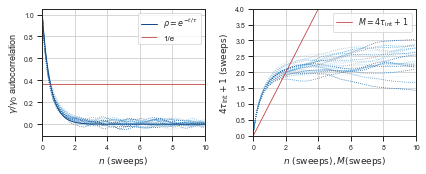

In [27]:
#q = 2.0
#n = 128

# size_data = {1.0: [256, 512, 1024, 2048],
#              2.0: [256, 512, 1024], # , 4096, 8192
#              4.0: []}

size_data = {1.0: [512]}

# size_data = {0.05: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              0.1: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              0.2: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              0.4: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              0.6: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              0.8: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              1.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              1.5: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              1.6: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              1.7: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              1.8: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              1.9: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              2.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              2.1: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              2.2: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              2.3: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              2.4: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              2.5: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              3.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              4.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              5.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              6.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              7.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              8.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              9.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              10.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144],
#              20.0: [128, 256],
#              30.0: [128, 256]}



#fig, axs = plt.subplots(1)

#axs = axs.flat

sns.set_palette(sns.color_palette("Blues"))


n_list = []
q_list = []
corr_list = []
gamma0_list = []
corrintegrated_list = []
M_list = []
rate_list = []
time_list = []
#corrfit_list = []


def sweepser(q, n):
    if q > 1:
        return sweeps(np.exp(abs(np.log(q)))*10, n=n)
    else:
        return sweeps(10, n=n)

def corrfit(x, t):
    return np.exp(-x/t)

q = 1

for n in size_data[q]:
    corrtimes = []
    corrtimesfit = []

    #plt.figure()

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,2.5))

    for data in SimDataIterator(q=q, n=n, name="compcorrelation"):
        metadata = metadata_creator(data).T
        #print(metadata)
        avg_time_per_flip_us = metadata["time_per_flip (us)"].values[0]
        #print(avg_time_per_flip_us)
        time_list.append(avg_time_per_flip_us)
        continuous_data = data["measurements"][0]["data"]#[slice:]
        #print("n:", n, "continuous_data (length)", len(continuous_data))
        
        #start_pos = 200000
        #continuous_data = continuous_data[start_pos:1]
        
        print("metadata", metadata["acceptance_rate (%)"])
        #print(continuous_data)
        rate = data["measurements"][0]["rate"]
        tmax = sweepser(q, n)
        print(tmax, rate)
        t, autocov = sample_autocovariance(continuous_data, tmax, steps=int(tmax/rate), rate=rate)
        
        corrtime = find_correlation_time(t, autocov)

        print(autocov)

        gamma0_list.append(autocov[0])
        #print(autocov[0])
        #print("corrtime:", corrtime)

        #print("tmax_iteration", tmax_iteration)
        


        #t = np.arange(tmax_iteration)*rate

        ax1.plot(t/(2*n), autocov/autocov[0], linestyle='dotted')

        rho = autocov/autocov[0]
        
        autocovint = 1/2 + cumulative_trapezoid(rho, x=t)

        #print(autocovint, t)

        t_ = t[:-1]
        rho_ = rho[:-1]


        

        # t/rate < 4*autocovint+1
        
        #plt.plot()
        #popt, pcov = curve_fit(f=corrfit, xdata=t, ydata=autocov/autocov[0])
#       
        #corrtimesfit.append(popt[0])
        #plt.plot(t_, 4*autocovint+1)
        #plt.plot(t, t)
        #print(np.where(t_ >= 4*autocovint+1)[0][0])
        #p#rint("n:", n, "q:", q)
        ax2.plot(t_/(2*n), (4*autocovint+1)/(2*n), linestyle='dotted')

        try:
            M = t_[t_ >= 4*autocovint+1][0]
        except:
            print("n:", n, "q:", q)
        #print("M", M)

        tint = trapezoid(rho_[t_ < 4*autocovint+1], x=t_[t_ < 4*autocovint+1])

        #print("tint:", tint)

        #plt.show()

        corrtimes.append(corrtime)

        n_list.append(n)
        q_list.append(q)
        #
        corr_list.append(corrtime)
        corrintegrated_list.append(tint)
        M_list.append(M)
        rate_list.append(rate)

        #corrfit_list.append(popt[0])
        
    
    # print("corrtimes", corrtimes)

    ax2.plot(t_/(2*n), t_/(2*n), colors['rbprimarycolor'], label=r"$M = 4 \tau_\mathrm{int}+1$")
    ax2.set_xlabel("$n\ (\mathrm{sweeps}), M (\mathrm{sweeps})$")
    ax2.set_ylabel(r"$4\tau_\mathrm{int}+1 \ (\mathrm{sweeps})$")
    ax2.set_ylim(0, 4)

    avgcorrtime = np.mean(corrtimes)
    errcorrtime = 1/(np.sqrt(len(corrtimes)))*np.std(corrtimes)

    avgcorrtime_int = np.mean(corrintegrated_list)
    errcorrtime_int = 1/(np.sqrt(len(corrintegrated_list)))*np.std(corrintegrated_list)

    avgcorrtimefit = np.mean(corrtimesfit)
    #errcorrtimefit = 1/(np.sqrt(len(corrtimesfit)))*np.std(corrtimesfit)

    # print(avgcorrtimefit, errcorrtimefit)
    # "${}$".format(avgcorrtime) + "$\pm$" + "${}$".format(errcorrtime)
    print("$n = {}$, ".format(n) + "$\\tau = " + errornumtostr((avgcorrtime/(2*n), errcorrtime/(2*n))) + "$", len(corrtimes))
    print("$n = {}$, ".format(n) + "$\\tau = " + errornumtostr((avgcorrtime_int/(2*n), errcorrtime_int/(2*n))) + "$", len(corrtimes))

   # print("t:", t)
    ax1.plot(t/(2*n), np.exp(-t/avgcorrtime), label=r"$\rho = e^{-t/\tau}$", linewidth=1, color=colors['rblinkcolor'])
    #plt.plot(t/(2*n), np.exp(-t/avgcorrtimefit), label="corrtimefit")
    ax1.hlines(1/np.e, xmin=np.min(t)/(2*n), xmax=np.max(t)/(2*n), label="1/e", color=colors['rbprimarycolor'])

    ax1.set_ylabel("$\gamma/\gamma_0$ autocorrelation")
    ax1.set_xlabel("$n\ (\mathrm{sweeps})$")
    ax1.set_xlim(0,10)
    ax1.legend()
    ax1.grid()
    ax2.grid()
    ax2.set_xlim(0,10)
    ax2.legend()

    fig.tight_layout()
    fig.savefig("docs/results/assets/autocorrelationtimefit.pdf")

    
    plt.show()


#axs[].grid()

In [ ]:
df

In [ ]:
df.groupby(['q', 'n']).mean()

In [ ]:
grouped = df.groupby(['q'])


In [ ]:
def lin_fit(x, a, b):
    return (a*x)+b



    #print(name, group)
grouped_n = df.groupby(['n'])

for (name, group) in grouped_n:

    means = grouped_n.mean()
    sem = grouped_n.sem()

    print

    print(means["corr"].values)
    print(means["corr"].index.values)
    print(sem["corr"].values)

    x = means["corr"].index.values
    y = means["corr"].values
    sigma = sem["corr"].values

    popt, pcov = curve_fit(f=lin_fit, xdata=x, ydata=y, sigma=sigma, p0=[1.5, 0])

    print(popt, pcov)
    plt.figure(dpi=600)

    plt.title(name)

    plt.plot(x, lin_fit(x, *popt))
    plt.errorbar(x=x, y=y, yerr=sigma, label="correlation", fmt='.')
    #plt.errorbar(x=n, y=mean["corrfit"].values, yerr=standarderror["corrfit"].values, label="correlation fit")
    plt.legend()
    plt.xlabel("$\\tau$")
    plt.ylabel("$n$ size")
    plt.loglog()
    plt.show()

    chi_sq = np.sum((lin_fit(x, *popt)-y)**2.0 / sigma**2.0)

    print("chi_sq", chi_sq, "dof", len(x)-1)
    
    
    #print(means, sem)
    #mean = grouped.mean()
    #standarderror = grouped.sem()


In [42]:
outputdf = df.groupby(['q', 'n']).agg(['mean', 'sem', 'count'])[["corr", "gamma0", "avg_time_per_flip (us)", "tint"]]
outputdf

corr                        gamma0                  \
                   mean         sem count        mean       sem count   
q     n                                                                 
0.05  128     91.285266    2.111014     8    2.043817  0.014915     8   
      256    190.595611    2.006270     8    4.028694  0.047372     8   
      512    369.153605    6.066389     8    7.770338  0.092954     8   
      1024   762.382445   14.546690     8   15.538066  0.181807     8   
      2048  1476.614420   24.265556     8   30.721715  0.224532     8   
...                 ...         ...   ...         ...       ...   ...   
30.00 128    450.546932   15.436957    16    8.716774  0.142531    16   
      256   1031.107407   38.286273    16   18.678390  0.311263    16   
      512   2016.210022   73.826000     8   36.163390  0.717560     8   
      1024  3600.375039   87.853169     8   72.495369  0.914313     8   
      2048  8416.876758  542.440659     8  153.329446  4.192033     8   

           avg_time_per_flip (us)                          tint              \
                             mean       sem count          mean         sem   
q     n                                                                       
0.05  128                6.452979  3.503965     8     93.684348    2.077676   
      256                6.930937  3.764578     8    189.884536    3.675278   
      512                7.454807  4.046824     8    375.517350    5.833586   
      1024               8.047491  4.369391     8    756.973073   20.725307   
      2048               8.698900  4.726099     8   1501.232555   23.709958   
...                           ...       ...   ...           ...         ...   
30.00 128                7.656034  3.423027    16    581.973491   27.102861   
      256                7.641475  3.512163    16   1451.786420   86.683674   
      512                8.146579  5.307529     8   2636.018424  143.676561   
      1024               8.709339  5.682427     8   5511.704777  589.707784   
      2048               9.334784  6.085519     8  11353.105806  919.593712   

                  
           count  
q     n           
0.05  128      8  
      256      8  
      512      8  
      1024     8  
      2048     8  
...          ...  
30.00 128     16  
      256     16  
      512      8  
      1024     8  
      2048     8  

[451 rows x 12 columns]

In [43]:
outputdf = df.groupby(['q', 'n']).agg(['mean', 'sem', 'count'])[["corr", "gamma0", "avg_time_per_flip (us)", "tint"]]#.loc[(1.0, 256)]["mean"]

frameout = pd.DataFrame()

frameout["tintmean"] = outputdf["tint"]["mean"]
frameout["tintsem"] = outputdf["tint"]["sem"]
frameout["mean"] = outputdf["corr"]["mean"]
frameout["sem"] = outputdf["corr"]["sem"]
frameout["gamma0"] = outputdf["gamma0"]["mean"]
frameout["gamma0_sem"] = outputdf["gamma0"]["sem"]
frameout["timeflip_us"] = outputdf["avg_time_per_flip (us)"]["mean"]
frameout["timeflip_us_sem"] = outputdf["avg_time_per_flip (us)"]["sem"]


frameout.to_pickle('simdata/compcorrelation/report.pkl')
frameout.to_csv('simdata/compcorrelation/report.csv')

frameout

tintmean     tintsem         mean         sem      gamma0  \
q     n                                                                     
0.05  128      93.684348    2.077676    91.285266    2.111014    2.043817   
      256     189.884536    3.675278   190.595611    2.006270    4.028694   
      512     375.517350    5.833586   369.153605    6.066389    7.770338   
      1024    756.973073   20.725307   762.382445   14.546690   15.538066   
      2048   1501.232555   23.709958  1476.614420   24.265556   30.721715   
...                  ...         ...          ...         ...         ...   
30.00 128     581.973491   27.102861   450.546932   15.436957    8.716774   
      256    1451.786420   86.683674  1031.107407   38.286273   18.678390   
      512    2636.018424  143.676561  2016.210022   73.826000   36.163390   
      1024   5511.704777  589.707784  3600.375039   87.853169   72.495369   
      2048  11353.105806  919.593712  8416.876758  542.440659  153.329446   

            gamma0_sem  timeflip_us  timeflip_us_sem  
q     n                                               
0.05  128     0.014915     6.452979         3.503965  
      256     0.047372     6.930937         3.764578  
      512     0.092954     7.454807         4.046824  
      1024    0.181807     8.047491         4.369391  
      2048    0.224532     8.698900         4.726099  
...                ...          ...              ...  
30.00 128     0.142531     7.656034         3.423027  
      256     0.311263     7.641475         3.512163  
      512     0.717560     8.146579         5.307529  
      1024    0.914313     8.709339         5.682427  
      2048    4.192033     9.334784         6.085519  

[451 rows x 8 columns]

In [3]:
frameout = pd.read_pickle('simdata/compcorrelation/report.pkl')


In [4]:
frameout

tintmean     tintsem         mean         sem      gamma0  \
q     n                                                                     
0.05  128      93.684348    2.077676    91.285266    2.111014    2.043817   
      256     189.884536    3.675278   190.595611    2.006270    4.028694   
      512     375.517350    5.833586   369.153605    6.066389    7.770338   
      1024    756.973073   20.725307   762.382445   14.546690   15.538066   
      2048   1501.232555   23.709958  1476.614420   24.265556   30.721715   
...                  ...         ...          ...         ...         ...   
30.00 128     581.973491   27.102861   450.546932   15.436957    8.716774   
      256    1451.786420   86.683674  1031.107407   38.286273   18.678390   
      512    2636.018424  143.676561  2016.210022   73.826000   36.163390   
      1024   5511.704777  589.707784  3600.375039   87.853169   72.495369   
      2048  11353.105806  919.593712  8416.876758  542.440659  153.329446   

            gamma0_sem  timeflip_us  timeflip_us_sem  
q     n                                               
0.05  128     0.014915     6.452979         3.503965  
      256     0.047372     6.930937         3.764578  
      512     0.092954     7.454807         4.046824  
      1024    0.181807     8.047491         4.369391  
      2048    0.224532     8.698900         4.726099  
...                ...          ...              ...  
30.00 128     0.142531     7.656034         3.423027  
      256     0.311263     7.641475         3.512163  
      512     0.717560     8.146579         5.307529  
      1024    0.914313     8.709339         5.682427  
      2048    4.192033     9.334784         6.085519  

[451 rows x 8 columns]

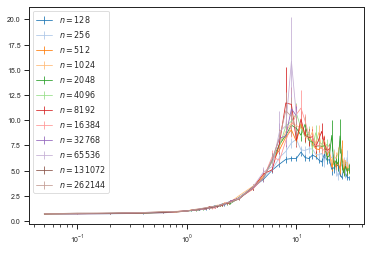

In [8]:
sns.set_palette(sns.color_palette("tab20"))

for n in [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144]:

    res = frameout.xs(n, level="n")
    
    nullvalue = res["tintmean"][1.0] 
    plt.errorbar(x=res.index, y=res["tintmean"]/nullvalue, yerr=res["tintsem"]/nullvalue, label="$n = {}$".format(n))
    #plt.errorbar(x=res.index, y=res["mean"], yerr=res["sem"], fmt='.')

plt.legend()
#plt.yscale("log")
plt.xscale("log")

Text(0, 0.5, '$\\tau \\ (\\mathrm{sweeps})$')

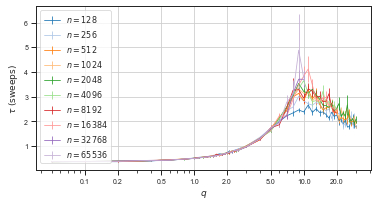

In [34]:
sns.set_palette(sns.color_palette("tab20")) # sns.set_palette(sns.color_palette("RdBu_r"))


fig, ax = plt.subplots(figsize=(6,3))

for n in [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]:

    res = frameout.xs(n, level="n")
    
    #nullvalue = res["tintmean"][1.0] 
    ax.errorbar(x=res.index, y=res["mean"]/(2*n), yerr=res["sem"]/(2*n), label="$n = {}$".format(n))
    #plt.errorbar(x=res.index, y=res["mean"], yerr=res["sem"], fmt='.')

ax.legend()
#plt.yscale("log", nonposy='clip')
#ax.set_title("Autocorrelation")
ax.grid()
ax.set_xscale("log")
ax.set_xticks([0.1, 0.2, 0.5, 1, 2, 5, 10, 20])
ax.set_xlabel("$q$")
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ylabel(r"$\tau \ (\mathrm{sweeps})$")
#plt.savefig("docs/results/assets/autocorrelationtime.pdf", bbox_inches='tight')


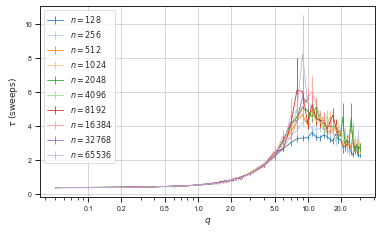

In [46]:
sns.set_palette(sns.color_palette("tab20")) # sns.set_palette(sns.color_palette("RdBu_r"))


fig, ax = plt.subplots(figsize=(6,3.5))

for n in [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]:

    res = frameout.xs(n, level="n")
    
    #nullvalue = res["tintmean"][1.0] 
    ax.errorbar(x=res.index, y=res["tintmean"]/(2*n), yerr=res["tintsem"]/(2*n), label="$n = {}$".format(n))
    #plt.errorbar(x=res.index, y=res["mean"], yerr=res["sem"], fmt='.')

ax.legend()
#plt.yscale("log", nonposy='clip')
#ax.set_title("Autocorrelation")
ax.grid()
ax.set_xscale("log")
ax.set_xticks([0.1, 0.2, 0.5, 1, 2, 5, 10, 20])
ax.set_xlabel("$q$")
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ylabel(r"$\tau \ (\mathrm{sweeps})$")
plt.savefig("docs/results/assets/autocorrelationtime.pdf", bbox_inches='tight')


In [ ]:
n = 128

res = frameout.xs(n, level="n")

plt.errorbar(x=res.index, y=res["tintmean"], yerr=res["tintsem"], fmt='.')
plt.errorbar(x=res.index, y=res["mean"], yerr=res["sem"], fmt='.')

#plt.yscale("log", nonposy='clip')
plt.xscale("log")

In [ ]:
n = 128

res = frameout.xs(n, level="n")

#plt.errorbar(x=res.index, y=, yerr=res["tintsem"], fmt='.')
error = (1/res["mean"])*np.sqrt(res["tintsem"]**2-(res["sem"]*res["mean"]/res["tintmean"])**2)
plt.errorbar(x=res.index, y=res["mean"]/res["tintmean"], yerr=error, fmt='.')
plt.grid()
plt.vlines(2, 0.5, 1.0)
#plt.yscale("log", nonposy='clip')
plt.xscale("log")

In [ ]:
standarderror

In [ ]:
n = mean.index.get_level_values(1).to_list()

In [ ]:
grouped.groups

In [ ]:
plt.errorbar(x=n, y=mean["corr"].values, yerr=standarderror["corr"].values, label="correlation", fmt='.')
#plt.errorbar(x=n, y=mean["corrfit"].values, yerr=standarderror["corrfit"].values, label="correlation fit")
plt.legend()
plt.xlabel("$\\tau$")
plt.ylabel("$n$ size")
plt.loglog()

In [ ]:
df = pd.read_pickle("simdata/compcorrelation/report.pkl")

In [ ]:
res = df.xs(1024, level="n")



plt.plot(res.index, res["mean"])
plt.yscale("log")


In [ ]:
int(np.round(df.loc[(df["q"] == 1.0) & (df["n"] == 128)]["mean"]))